In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('StudentsPerformance_modified.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   957 non-null    float64
 6   reading score                994 non-null    float64
 7   writing score                991 non-null    float64
 8   grade                        0 non-null      float64
dtypes: float64(4), object(5)
memory usage: 70.4+ KB


In [4]:
df.describe()

,math score,reading score,writing score,grade
count,957.000000,994.000000,991.000000,0.0
mean,66.323929,68.008048,69.487386,NaN
std,18.280119,16.602270,29.563757,NaN
min,-89.000000,3.000000,10.000000,NaN
25%,57.000000,58.000000,57.000000,NaN
50%,66.000000,69.500000,69.000000,NaN
75%,77.000000,79.000000,79.000000,NaN
max,334.000000,100.000000,567.000000,NaN


In [5]:
df.drop('grade',axis='columns',inplace=True)

In [6]:
numeric_vars = df.select_dtypes(include=np.number).columns


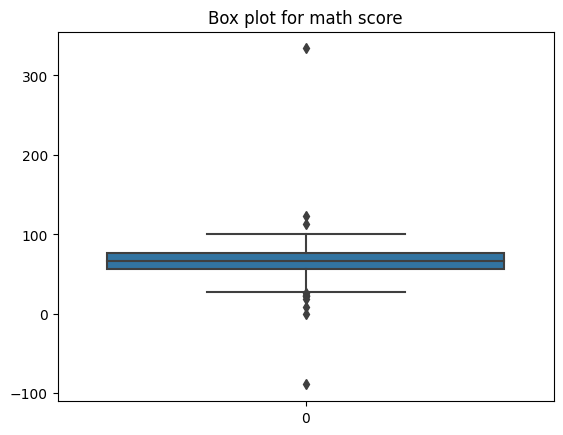

In [7]:
# # Create a box plot for each numeric variable
# for var in numeric_vars:
    
plt.figure()
sns.boxplot(df['math score'])
plt.title("Box plot for math score")
plt.show()




In [8]:
q1=np.percentile(df['math score'],25,interpolation="midpoint")


    

C:\Users\ajayp\AppData\Local\Temp\ipykernel_22568\3843003577.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q1=np.percentile(df['math score'],25,interpolation="midpoint")


In [9]:
q3=np.percentile(df['math score'],75,interpolation="midpoint")

C:\Users\ajayp\AppData\Local\Temp\ipykernel_22568\3612608989.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q3=np.percentile(df['math score'],75,interpolation="midpoint")


In [10]:
iqr=q3-q1
up=q3+1.5*iqr
low=q1-1.5*iqr

In [11]:
uplier=np.where(df['math score']>=up)
df.drop(uplier[0],inplace=True)

In [12]:
print(np.where(df["math score"]>=up))

(array([], dtype=int64),)


In [13]:
lowlier=np.where(df['math score']<=low)
df.drop(lowlier[0],inplace=True)

In [14]:
print(np.where(df['math score']<=low))

(array([], dtype=int64),)


<AxesSubplot: >

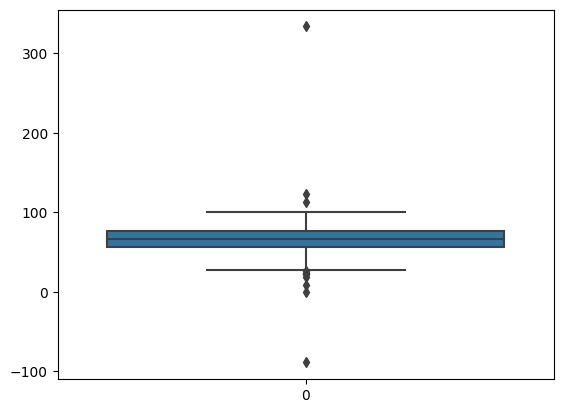

In [15]:

sns.boxplot(df['math score'])


In [16]:
# Apply min-max normalization to each numeric variable

min_val = df['math score'].min()
max_val = df['math score'].max()
df['math score'] = (df['math score'] - min_val) / (max_val - min_val)


In [17]:
# Apply z-score normalization to each numeric variable

mean_val = df['math score'].mean()
std_val = df['math score'].std()
df['math score'] = (df['math score'] - mean_val) / std_val  

<AxesSubplot: >

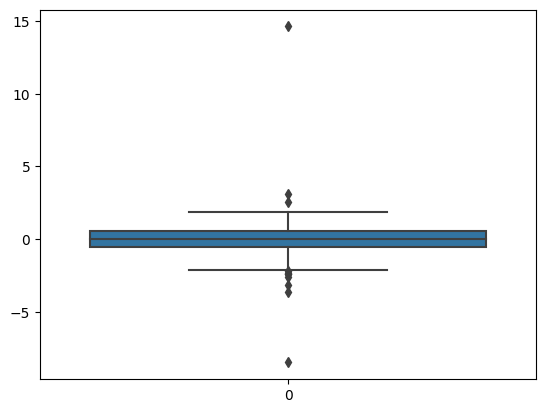

In [18]:
sns.boxplot(df['math score'])